In [6]:
import pandas as pd
import numpy as np
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score


In [7]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/atelier projet/heart_2020.csv')
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0           NaN         NaN     NaN        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0         NaN    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         NaN  Female        40-44  White       No   

  PhysicalActivity  GenHealth

In [8]:
df.shape

(319795, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      287693 non-null  object 
 1   BMI               287905 non-null  float64
 2   Smoking           287953 non-null  object 
 3   AlcoholDrinking   287832 non-null  object 
 4   Stroke            287790 non-null  object 
 5   PhysicalHealth    287814 non-null  float64
 6   MentalHealth      287910 non-null  float64
 7   DiffWalking       287828 non-null  object 
 8   Sex               287671 non-null  object 
 9   AgeCategory       288053 non-null  object 
 10  Race              287362 non-null  object 
 11  Diabetic          287699 non-null  object 
 12  PhysicalActivity  287768 non-null  object 
 13  GenHealth         287755 non-null  object 
 14  SleepTime         287885 non-null  float64
 15  Asthma            287804 non-null  object 
 16  KidneyDisease     28

In [10]:
df.isnull().sum()

,0
HeartDisease,32102
BMI,31890
Smoking,31842
AlcoholDrinking,31963
Stroke,32005
PhysicalHealth,31981
MentalHealth,31885
DiffWalking,31967
Sex,32124
AgeCategory,31742


In [11]:
df.nunique()

,0
HeartDisease,2
BMI,3523
Smoking,2
AlcoholDrinking,2
Stroke,2
PhysicalHealth,31
MentalHealth,31
DiffWalking,2
Sex,3
AgeCategory,14


In [12]:
df.describe(include ='all')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,287693,287905.000000,287953,287832,287790,287814.000000,287910.000000,287828,287671,288053,287362,287699,287768,287755,287885.000000,287804,287829,287725
unique,2,NaN,2,2,2,NaN,NaN,2,3,14,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,263054,NaN,169233,268175,276969,NaN,NaN,247836,150884,30729,220257,242640,223080,102502,NaN,249124,277232,260811
mean,NaN,28.320730,NaN,NaN,NaN,3.364645,3.900795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.096466,NaN,NaN,NaN
std,NaN,6.351376,NaN,NaN,NaN,7.939945,7.957202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.434826,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.320000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.400000,NaN,NaN,NaN,2.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [13]:
# Drop rows where target is missing
df = df.dropna(subset=['HeartDisease'])

# Fill missing values in numerical columns with the median
numerical_columns = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
for column in numerical_columns:
    df[column].fillna(df[column].median(), inplace=True)

# Fill missing values in categorical columns with the mode
categorical_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
                       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Fix inconsistent categories
df['Sex'].replace('Unknown', df['Sex'].mode()[0], inplace=True)
df['AgeCategory'].replace('100+', '80 or older', inplace=True)

# Convert to numeric
df['BMI'] = pd.to_numeric(df['BMI'], errors='coerce')
df['PhysicalHealth'] = pd.to_numeric(df['PhysicalHealth'], errors='coerce')

# Remove outliers
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

print(borne_inf,borne_sup)

df = df[(df['BMI'] >= borne_inf) & (df['BMI'] <= borne_sup)]

print(df.head())
print(df.isnull().sum())


<ipython-input-13-5dd071d057c8>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
<ipython-input-13-5dd071d057c8>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

14.65 40.57
  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0           0.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0          No  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        7.0    Yes            No        Ye

In [14]:
l_num=list(df._get_numeric_data().columns)
l_discret=list(set(df.columns)-set(l_num))
print("l_num=",l_num)
print("l_discret=",l_discret)


l_num= ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
l_discret= ['Stroke', 'Race', 'HeartDisease', 'AgeCategory', 'AlcoholDrinking', 'DiffWalking', 'KidneyDisease', 'SkinCancer', 'PhysicalActivity', 'GenHealth', 'Asthma', 'Smoking', 'Sex', 'Diabetic']


In [15]:
df_numeric = df.select_dtypes(include=[np.number])
df_categorical = df.select_dtypes(include=['object', 'category'])
df_categorical

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Very good,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,No,Female,40-44,White,No,Yes,Very good,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,No,No,No,No,No,Female,18-24,Hispanic,No,Yes,Excellent,No,No,No
319790,Yes,Yes,No,No,Yes,Male,65-69,Hispanic,Yes,No,Fair,Yes,No,No
319791,No,Yes,No,No,No,Male,35-39,Hispanic,No,Yes,Very good,No,No,No
319792,No,No,No,No,No,Female,45-49,Hispanic,No,Yes,Good,No,No,No


In [16]:
df.nunique()

,0
HeartDisease,2
BMI,2134
Smoking,2
AlcoholDrinking,2
Stroke,2
PhysicalHealth,31
MentalHealth,31
DiffWalking,2
Sex,2
AgeCategory,13


In [17]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

<ipython-input-18-0d8ef42b228e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="HeartDisease", data=df, kind="count", palette={"Yes": "crimson", "No": "skyblue"})


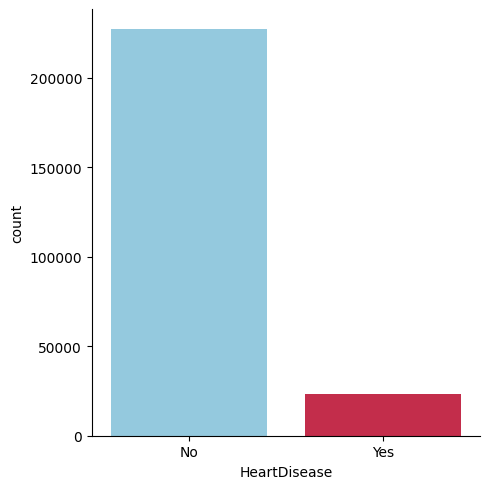

In [18]:
sns.catplot(x="HeartDisease", data=df, kind="count", palette={"Yes": "crimson", "No": "skyblue"})
plt.show()

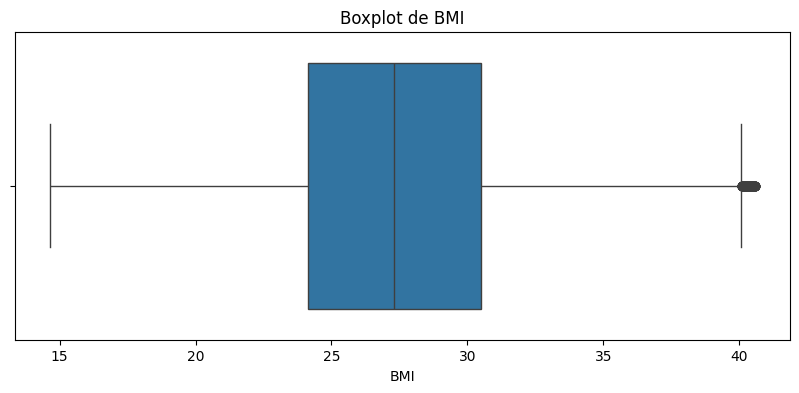

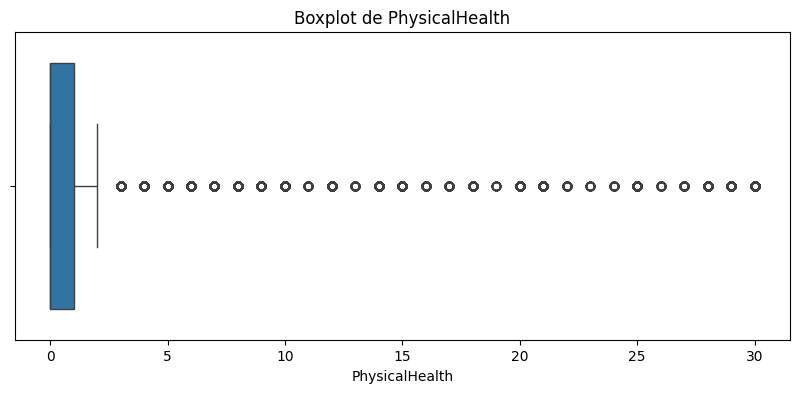

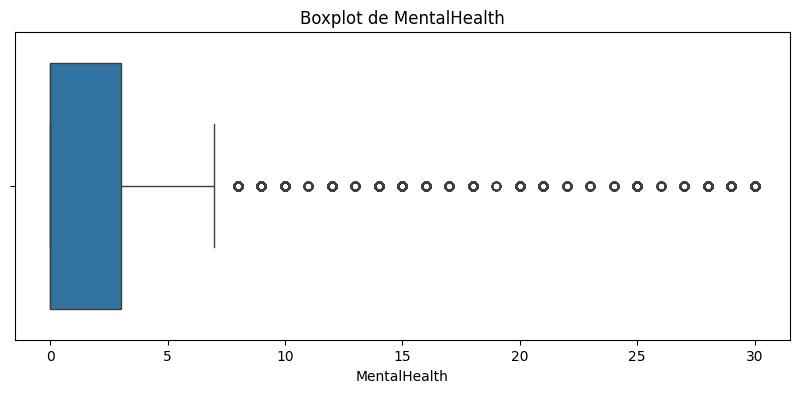

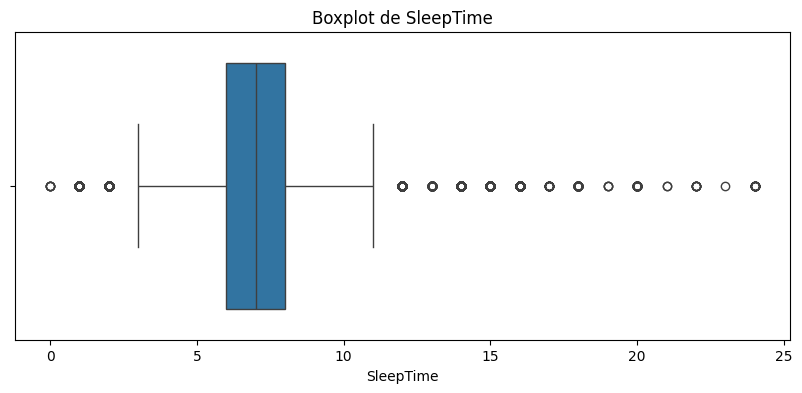

In [19]:
for colonne in l_num:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[colonne])
    plt.title(f'Boxplot de {colonne}')
    plt.show()

In [20]:
num_feats=df.select_dtypes("number").columns
num_feats

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

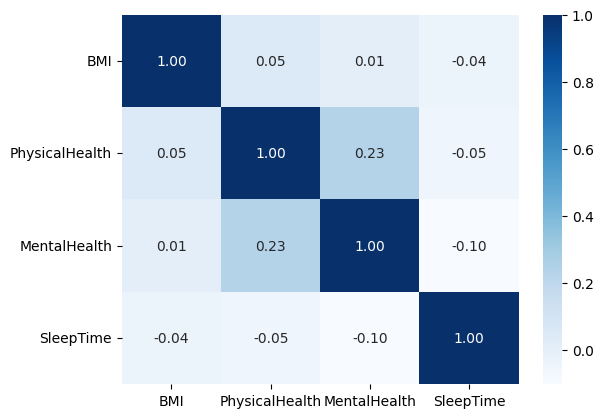

In [21]:
sns.heatmap(df[num_feats].corr(),annot=True,fmt="0.02f",cmap="Blues")
plt.show()

In [22]:
cat_feats = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
             'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
             'Asthma', 'KidneyDisease', 'SkinCancer']

num_feats = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(df.drop("HeartDisease",axis=1),df["HeartDisease"],stratify=df["HeartDisease"],shuffle=True,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((175003, 17), (75002, 17), (175003,), (75002,))

In [24]:
tran = ColumnTransformer(transformers=[
    ("Gategorial", OneHotEncoder(drop='first'), cat_feats),
    ("numeric", StandardScaler(), num_feats)
])
tran

ColumnTransformer(transformers=[('Gategorial', OneHotEncoder(drop='first'),
                                 ['Smoking', 'AlcoholDrinking', 'Stroke',
                                  'DiffWalking', 'Sex', 'AgeCategory', 'Race',
                                  'Diabetic', 'PhysicalActivity', 'GenHealth',
                                  'Asthma', 'KidneyDisease', 'SkinCancer']),
                                ('numeric', StandardScaler(),
                                 ['BMI', 'PhysicalHealth', 'MentalHealth',
                                  'SleepTime'])])

In [25]:
#model 1: LogisticRegression
pipeline_LR = Pipeline(steps=[
    ("preprocessing", tran),
    ("classification", LogisticRegression(max_iter=10000))
])
pipeline_LR

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('Gategorial',
                                                  OneHotEncoder(drop='first'),
                                                  ['Smoking', 'AlcoholDrinking',
                                                   'Stroke', 'DiffWalking',
                                                   'Sex', 'AgeCategory', 'Race',
                                                   'Diabetic',
                                                   'PhysicalActivity',
                                                   'GenHealth', 'Asthma',
                                                   'KidneyDisease',
                                                   'SkinCancer']),
                                                 ('numeric', StandardScaler(),
                                                  ['BMI', 'PhysicalHealth',
                                                   'MentalHealth',
                                                   'SleepTime'])])),
                ('classification', LogisticRegression(max_iter=10000))])

In [26]:
# Define Features and Target
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Pipeline
pipeline_LR.fit(X_train, y_train)  # Use pipeline_LR here

# Predict on Test Set
y_pred = pipeline_LR.predict(X_test)  # Use pipeline_LR here
y_pred_prob = pipeline_LR.predict_proba(X_test)[:, 1]

# Evaluate the Model
print("Score on test set:", pipeline_LR.score(X_test, y_test))  # Use pipeline_LR here

# Print Classification Report
from sklearn.metrics import classification_report
print("\n Classification Report:\n", classification_report(y_test, y_pred))

Score on test set: 0.9110417791644168

 Classification Report:
               precision    recall  f1-score   support

          No       0.92      0.99      0.95     45483
         Yes       0.55      0.09      0.16      4518

    accuracy                           0.91     50001
   macro avg       0.73      0.54      0.56     50001
weighted avg       0.88      0.91      0.88     50001



In [27]:
from sklearn.ensemble import GradientBoostingClassifier

# model2 : GradientBoostingClassifier

pipeline_gb = Pipeline(steps=[
    ('preprocessing', tran),
    ('classification', GradientBoostingClassifier(n_estimators=100, random_state=42))
])
pipeline_gb


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('Gategorial',
                                                  OneHotEncoder(drop='first'),
                                                  ['Smoking', 'AlcoholDrinking',
                                                   'Stroke', 'DiffWalking',
                                                   'Sex', 'AgeCategory', 'Race',
                                                   'Diabetic',
                                                   'PhysicalActivity',
                                                   'GenHealth', 'Asthma',
                                                   'KidneyDisease',
                                                   'SkinCancer']),
                                                 ('numeric', StandardScaler(),
                                                  ['BMI', 'PhysicalHealth',
                                                   'MentalHealth',
                                                   'SleepTime'])])),
                ('classification',
                 GradientBoostingClassifier(random_state=42))])

In [28]:

# Train the Model
pipeline_gb.fit(X_train, y_train)

# Predict on Test Set
y_pred = pipeline_gb.predict(X_test)
y_pred_prob = pipeline_gb.predict_proba(X_test)[:, 1]

# Evaluate the Model
print("Accuracy on test set:", pipeline_gb.score(X_test, y_test))
print("\n Classification Report:\n", classification_report(y_test, y_pred))



Accuracy on test set: 0.9111817763644727

 Classification Report:
               precision    recall  f1-score   support

          No       0.92      0.99      0.95     45483
         Yes       0.57      0.07      0.13      4518

    accuracy                           0.91     50001
   macro avg       0.74      0.53      0.54     50001
weighted avg       0.88      0.91      0.88     50001



In [29]:
# model 3 :LinearSVC

pipeline_lsvc = Pipeline(steps=[
    ("preprocessing", tran),
    ("classification", LinearSVC(max_iter=5000, random_state=42))
])

pipeline_lsvc


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('Gategorial',
                                                  OneHotEncoder(drop='first'),
                                                  ['Smoking', 'AlcoholDrinking',
                                                   'Stroke', 'DiffWalking',
                                                   'Sex', 'AgeCategory', 'Race',
                                                   'Diabetic',
                                                   'PhysicalActivity',
                                                   'GenHealth', 'Asthma',
                                                   'KidneyDisease',
                                                   'SkinCancer']),
                                                 ('numeric', StandardScaler(),
                                                  ['BMI', 'PhysicalHealth',
                                                   'MentalHealth',
                                                   'SleepTime'])])),
                ('classification', LinearSVC(max_iter=5000, random_state=42))])

In [30]:
# Train the model
pipeline_lsvc.fit(X_train, y_train)

# Predict on test set
y_pred = pipeline_lsvc.predict(X_test)

# Accuracy
print(" Accuracy on test set:", accuracy_score(y_test, y_pred))

# Classification report
print(" \n Classification Report:\n", classification_report(y_test, y_pred))



 Accuracy on test set: 0.9111417771644567
 
 Classification Report:
               precision    recall  f1-score   support

          No       0.91      1.00      0.95     45483
         Yes       0.64      0.04      0.07      4518

    accuracy                           0.91     50001
   macro avg       0.78      0.52      0.51     50001
weighted avg       0.89      0.91      0.87     50001



In [31]:
#model4: PassiveAggressiveClassifier
pipeline_pa = Pipeline(steps=[
    ("preprocessing", tran),
    ("classification", PassiveAggressiveClassifier(max_iter=1000, random_state=42))
])
pipeline_pa

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('Gategorial',
                                                  OneHotEncoder(drop='first'),
                                                  ['Smoking', 'AlcoholDrinking',
                                                   'Stroke', 'DiffWalking',
                                                   'Sex', 'AgeCategory', 'Race',
                                                   'Diabetic',
                                                   'PhysicalActivity',
                                                   'GenHealth', 'Asthma',
                                                   'KidneyDisease',
                                                   'SkinCancer']),
                                                 ('numeric', StandardScaler(),
                                                  ['BMI', 'PhysicalHealth',
                                                   'MentalHealth',
                                                   'SleepTime'])])),
                ('classification',
                 PassiveAggressiveClassifier(random_state=42))])

In [32]:
pipeline_pa.fit(X_train, y_train)

# Predict on test set
y_pred = pipeline_pa.predict(X_test)

# Evaluate the model
# Accuracy
print(" Accuracy on test set:", accuracy_score(y_test, y_pred))

# Classification report
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy on test set: 0.8950020999580008

 Classification Report:
               precision    recall  f1-score   support

          No       0.92      0.97      0.94     45483
         Yes       0.29      0.11      0.16      4518

    accuracy                           0.90     50001
   macro avg       0.60      0.54      0.55     50001
weighted avg       0.86      0.90      0.87     50001



In [33]:
# Donc selon les résultats de précision (Accuracy)  , le plus performant modèle est : GradientBoostingClassifier


In [36]:
# Sauvegarde
joblib.dump(pipeline_gb, '/content/drive/MyDrive/health_pipeline.joblib')

# Test
print("Prédiction :", pipeline_gb.predict(X_test.iloc[:1]))

Prédiction : ['No']
